--- REGRESSION ANALYSIS: Predicting Total Charges from Length of Stay ---
Model Intercept: 1164.85
Model Coefficient (Slope): 514.56

--- Performance Metrics ---
Mean Squared Error (MSE): 1286846.49
Root Mean Squared Error (RMSE): 1134.39
R-squared (R^2 Score): 0.7655


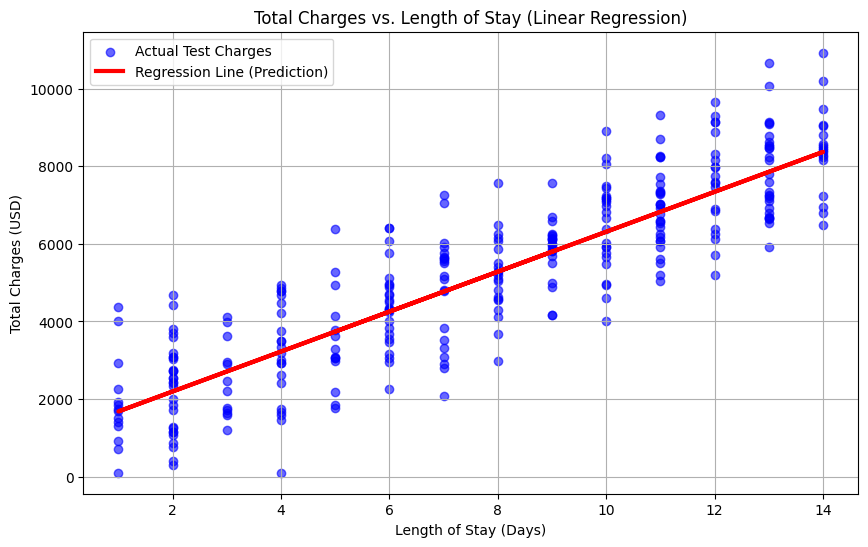

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
N_PATIENTS = 1000
START_DATE = datetime(2023, 1, 1)

def generate_dates(start_date, n):
    return [start_date + timedelta(days=np.random.randint(0, 365)) for _ in range(n)]

def generate_age(n):
    ages = np.random.normal(loc=45, scale=20, size=n).astype(int)
    return np.clip(ages, 1, 95)

def generate_diagnoses(n):
    diagnoses = ['I10.9 (Hypertension)', 'J45.9 (Asthma)', 'E11.9 (Diabetes Type 2)',
                 'F32.9 (Depression)', 'Z00.0 (Routine Check)', 'K80.2 (Gallstones)']
    return np.random.choice(diagnoses, size=n, p=[0.25, 0.15, 0.20, 0.10, 0.20, 0.10])

# --- Data Generation ---
data = pd.DataFrame({
    'Patient_ID': [f'P{i:04d}' for i in range(N_PATIENTS)],
    'Admission_Date': generate_dates(START_DATE, N_PATIENTS),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], size=N_PATIENTS, p=[0.48, 0.50, 0.02]),
    'Age': generate_age(N_PATIENTS),
    'Diagnosis': generate_diagnoses(N_PATIENTS),
    'Length_of_Stay_Days': np.random.randint(1, 15, size=N_PATIENTS),
    'Has_Insurance': np.random.choice([True, False], size=N_PATIENTS, p=[0.85, 0.15]),
})

base_charge = data['Diagnosis'].apply(lambda x:
    3000 if 'Gallstones' in x else
    1500 if 'Hypertension' in x or 'Diabetes' in x else
    800
)

daily_rate = 500
noise = np.random.normal(0, 1000, N_PATIENTS)
data['Total_Charges_USD'] = (base_charge + (data['Length_of_Stay_Days'] * daily_rate) + noise).round(2)
data['Total_Charges_USD'] = data['Total_Charges_USD'].apply(lambda x: max(100, x))

# --- Regression Setup ---

# Define Feature (X) and Target (y)
# X must be 2D, so we use .values.reshape(-1, 1) for a single feature
X = data['Length_of_Stay_Days'].values.reshape(-1, 1)
y = data['Total_Charges_USD'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Train the Model ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Calculate Metrics ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- REGRESSION ANALYSIS: Predicting Total Charges from Length of Stay ---")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}\n")

print("--- Performance Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2 Score): {r2:.4f}")

# --- Plot the Regression Line ---
plt.figure(figsize=(10, 6))

# Plot actual test data points
plt.scatter(X_test, y_test, color='blue', label='Actual Test Charges', alpha=0.6)

# Plot the predicted regression line
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line (Prediction)')

plt.title('Total Charges vs. Length of Stay (Linear Regression)')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Total Charges (USD)')
plt.legend()
plt.grid(True)
plt.show()